<a href="https://colab.research.google.com/github/dig025/COGS108_Repo/blob/master/CSE152_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2

For this homework you will be using pytorch and torchvision library for neural networks and datasets. You can install them with pip install torch torchvision.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score
import pandas as pd

# 1 Question 1 Principal Component Analysis

This problem will guide you through the principal component analysis. You will be using a classical dataset, the MNIST hand written digit dataset.

shapes: (60000, 28, 28) (60000,)
label: 5


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


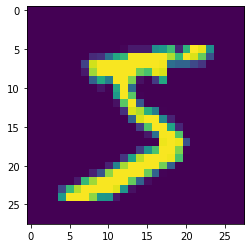

In [2]:
 # Load the MNIST dataset
mnist = MNIST('.', download=True)
data = mnist.train_data.numpy()
labels = mnist.train_labels.numpy()
print('shapes:', data.shape, labels.shape)
plt.imshow(data[0])
print('label:', labels[0])

### 1.1 Step 1.1 Familiarize yourself with the data

For this task, you will be using the torchvision package that provides the MNIST dataset. For each digit class(0-9), plot 1 image from the class and store those 10 images for each digit class in the array digit_images.

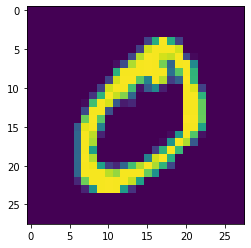

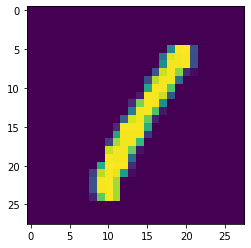

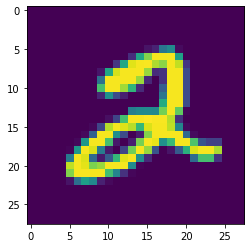

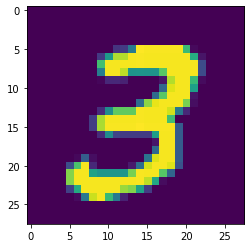

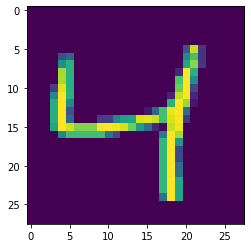

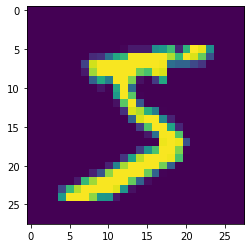

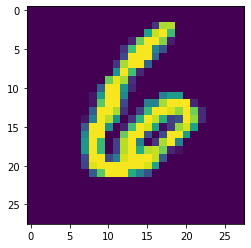

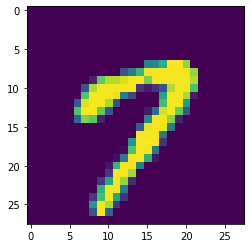

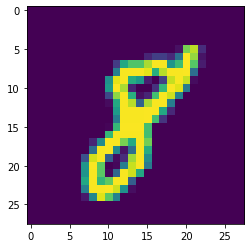

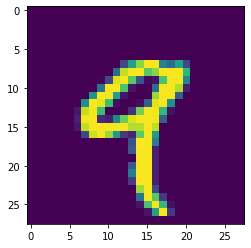

In [3]:
digit_images = np.zeros([10, 28, 28])
for i in range(10):
  for x,y in zip(data, labels):
    if y == i:
      digit_images[i] = x
      break
  plt.imshow(digit_images[i])
  plt.show()


## 2 Question 2. PCA

This section deals with performing PCA on the MNIST dataset. We will explore 2 different methods of performing PCA. First using SVD, second using Eigen Decomposition. Please refer to the lecture slides, in particular slides 30-32 from Lec 3 which can be found [here](https://ucsd-cse-152.github.io/FA20/slides/Lec3.pdf).

### 2.1 Question 2.1 Centering the data [5 points]

For each image, flatten it to a 1-D vector. To perform PCA on the dataset, we first move the data points so they have 0 mean on each dimension. Store the centered data in variable **data_centered** and the mean of each dimension in variable **data_mean**.


In [4]:
data_centered = None
data_mean = None
### YOUR CODE HERE
# hint: You need np.mean() and x.reshape() functions (x is a matrix). 
D = np.zeros([data.shape[0], data.shape[1] * data.shape[2]])  #New data matrix where each row is a flattened image
for i in range(data.shape[0]):
  D[i] = data[i].reshape(data[i].size)

x_bar = np.mean(D, axis = 0) # Get the average row
left_mult = np.ones([60000,1]) # Use this to create an array of all rows = x_bar
data_mean = left_mult * x_bar # Our average data(matrix)

data_centered = D - data_mean

### END OF CODE

### 2.2 Compute the Singular Value Decomposition (SVD) for the given data [5 points]


In [5]:
U,S,V = None, None, None
### YOUR CODE HERE
# hint: You need np.linalg.svd function here 
U,S,V = np.linalg.svd(data_centered, full_matrices=False)
### END OF CODE

### Question 2.3 Project data onto the first 2 principal components [5 points]

Now you need to project the centered data on the 2D space formed by the eigenvectors corresponding to the 2 largest eigenvalues. Create a 2D scatter plot where you need to assign a unique color to each digit class.

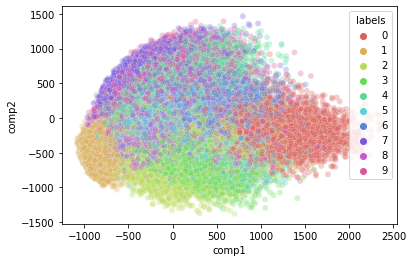

In [6]:
import seaborn as sns 
# this is the library for visualization
# you can use sns.scatterplot() function to visualize a scattered plot of the results

### YOUR CODE HERE
dimension = 20
projected = np.zeros([60000,dimension]) #added higher dimension functionality

for i in range(dimension): 
  p = np.dot(data_centered, V[i])
  projected[:,i] = p
### END OF CODE

df = pd.DataFrame(data = projected[:,:2], columns=['comp1', 'comp2']) #changed it so we only plot the first 2 cols
df['labels'] = pd.Series(labels)
sns.scatterplot(
    x="comp1", y="comp2",
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)


### Question 2.4 Unproject data back to high dimensions [5 points]
For this question, you need to project the 10 images you plotted in **1.2.3** on the first 2 principal components, and then unproject the "compressed" 2-D representations back to the original space. Plot the "compressed" digit (the reconstructed digit). Do they look similar to the original images?

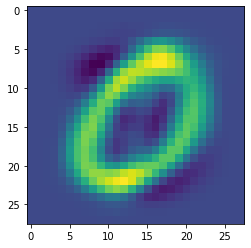

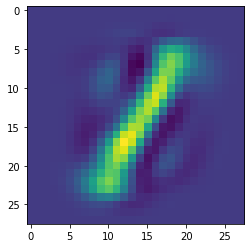

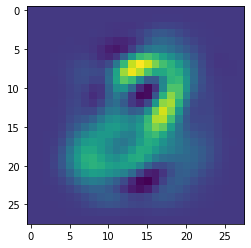

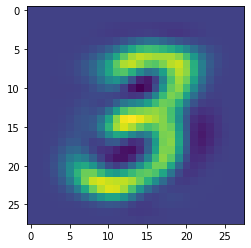

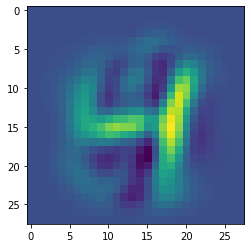

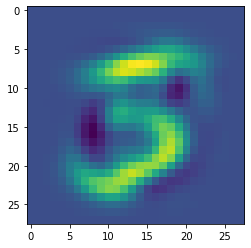

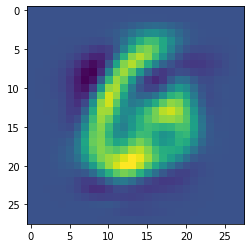

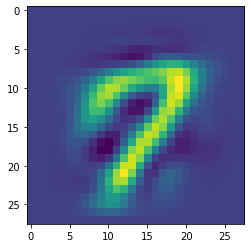

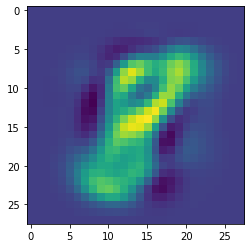

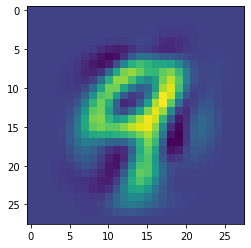

In my opinion they dont look like the originals. Instead they seem to have mixed together (using 2 dimensions)
I tried using 5,then 10, then 20 dimensions, personally around 20 dimensions I started being able to see the resemblence
Perhaps it is because the size of the images are 28x28, you can have at most 28 𝜎's but also as little as 1 either way anything pas 28 doesnt really change anything.


In [7]:
### YOUR CODE HERE
reconstructed = np.dot(projected, V[:dimension]) + data_mean #added variable dimensionality
### END OF CODE

digit_images = np.zeros([10, 28, 28])
for i in range(10):
  for x,y in zip(reconstructed, labels):
    x = x.reshape(28,28)
    if y == i:
      digit_images[i] = x
      break
  plt.imshow(digit_images[i])
  plt.show()


print("In my opinion they dont look like the originals. Instead they seem to have mixed together (using 2 dimensions)")
print("I tried using 5,then 10, then 20 dimensions, personally around 20 dimensions I started being able to see the resemblence")
print("Perhaps it is because the size of the images are 28x28, you can have at most 28 𝜎's but also as little as 1 either way anything pas 28 doesnt really change anything.")


### Question 2.5 Choose a better low dimension space. [5pt]
Do the previous problem with more dimensions (e.g. 3, 5, 10, 20, 50, 100). You only need to show results for one of them. Answer the following questions. How many dimensions are required to represent the digits reasonably well? Briefly explain what criteria you used to select the number of dimensions and how it relates to the SVD.

### Question 2.6 PCA Using Eigen Decomposition

Now we will perform PCA using method 2: Eigen Decomposition.

For this method, we need to compute the covariance matrix of the data first. Prof. Su has added three slides at the end of Lec 4 (https://ucsd-cse-152.github.io/FA20/slides/Lec3.pdf) from P30-P32. Please read the slides before you proceed. 

### Question 2.6.1 Compute the covariance matrix of the data [5 points]
You need to store the covariance matrix of the data in variable data_covmat. You may not use numpy.cov

In [8]:
data_covmat = None
### YOUR CODE HERE
data_covmat = np.dot(data_centered.T,data_centered)
### END OF CODE

### Question 2.6.2 Compute the eigenvalues and eigen vectors of the covariance matrix [5pt]
You need to store the eigenvalues of the covariance matrix in variable `covmat_eig`, sorted in descending order and the corresponding eigenvectors in `covmat_eigvec`. Then you need to plot the eigenvalues with `plt.plot`. You can use any numpy function.

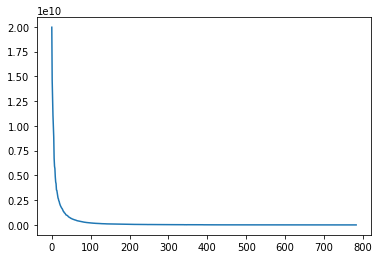

In [9]:
covmat_eigvec, covmat_eig = None, None
### YOUR CODE HERE
# hint: you may use np.linalg.eig
covmat_eig, covmat_eigvec = np.linalg.eig(data_covmat)
plt.plot(covmat_eig)
### END OF CODE

### Question 2.6.3 Project data onto the first 2 principal components [5 points]

Now you need to project the centered data on the 2D space formed by the eigenvectors corresponding to the 2 largest eigenvalues. Create a 2D scatter plot where you need to assign a unique color to each digit class. Feel free to use any plotting libraries

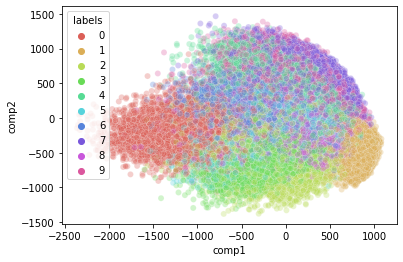

In [10]:
import seaborn as sns
### YOUR CODE HERE
dimension = 20
projected = np.zeros([60000,dimension]) #added higher dimension functionality

for i in range(dimension): 
  p = np.dot(data_centered, covmat_eigvec.T[i])
  projected[:,i] = p
### END OF CODE
df = pd.DataFrame(data = projected[:,:2], columns=['comp1', 'comp2'])
df['labels'] = pd.Series(labels)
sns.scatterplot(
    x="comp1", y="comp2",
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

### Question 2.6.4 Compare the 2 approaches

What if any is the difference/similariy in computing PCA between the 2 approaches ? Briefly justify your answer.

ANSWER:
My plot is flipped horizontaly.. 
However.. a similarity is that you are using the eigenvectors to project to a lower dimension (where variance is highest).

## Question 3: Neural Networks for Regression

As an introduction to the idea of performing regression using Neural Networks, we will first try to build a basic MultiLayer Perceptron (MLP) for fitting a line to random data. 

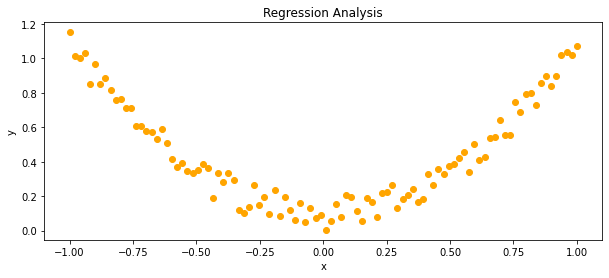

In [11]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 3.1 Fitting a basic model

Let's try to fit a basic 2 layer network for this given data. We will use one hidden layer with 10 neurons/units and the output layer has one neuron to predict a single value. For this given data, given the x value our goal is to predict a y value which most accurately describes the data.

The basic pytorch work flow involves 4 steps:
- Implement the model and initialize it
- Decide on the right optimizer
- Choose an appropriate loss function for your learning task
- train the model over the given data

In [12]:
# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


For this simple model we will be using the MSE Loss which is the most common and simple loss function used for regression tasks. The MSE loss is the l2 norm of the difference. 
The MSE loss is given by:
$$
L(x,y) = \frac{1}{N}\Sigma_{i=1}^{i=n} (x - y)^2
$$
where $N$ is the number of data points

For our optimizer we will use Stochastic Gradient Descent (SGD) which is sufficient for this problem

In [13]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

We now train the network on the data for 200 epochs. The training process involves first forward propogating the input through the network after which we calculate the loss value from the current prediction. We then backpropogate the gradient of the loss all the way back through the network. This is done by the `loss.backward()` statement. Once the gradients have been computed we update the weights which in pytorch can be easily done by calling the `optimizer.step()` function.

In [14]:
# train the network
for t in range(200):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

Let's compare how our model performs by plotting the line fit by our basic MLP on top of the data that we generated

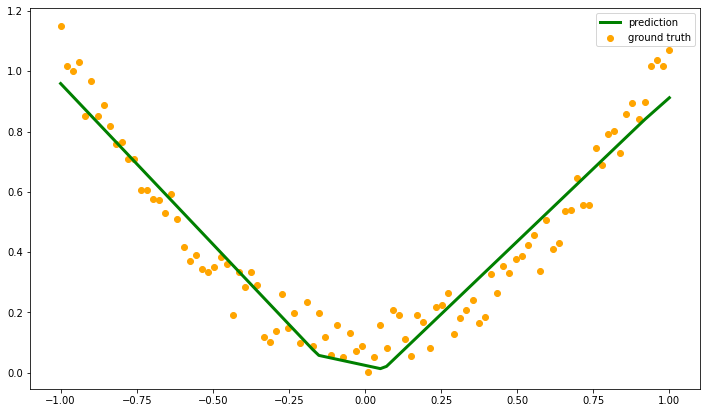

In [15]:
fig, ax = plt.subplots(figsize=(12,7))    
ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange", label='ground truth')
ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3, label='prediction')
plt.legend()
plt.show()

### Q3.2 Fit a model for the sin function

We tried to fit a model to a basic randomly generated dataset. Let's now try to implement a MLP that can fit the sin function. We start once again by generating a dataset for this.

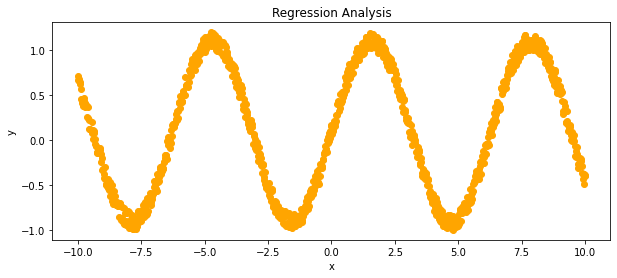

In [16]:

x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  # x data (tensor), shape=(100, 1)
y = torch.sin(x) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

x, y = Variable(x), Variable(y)

plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Q 3.2 Implement the MLP [5 points]




Fill in the template code below to configure your model. Implement the model description as well as the forward pass for the network. 

In [17]:
class Net(torch.nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      
      self.fc1 = torch.nn.Linear(1, 200)
      # ... continue to construct the network
      ### YOUR CODE HERE
      self.relu = torch.nn.ReLU(inplace=True)
      self.fc2 = torch.nn.Linear(200, 1024)
      self.fc3 = torch.nn.Linear(1024, 1)

    
      ### END OF CODE

    def forward(self, x):
      ### YOUR CODE HERE
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      x = self.relu(x)
      x = self.fc3(x)
      

      ### END OF CODE
      return x


In [18]:
net = Net()

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

BATCH_SIZE = 64
EPOCH = 200

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)


# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader):
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

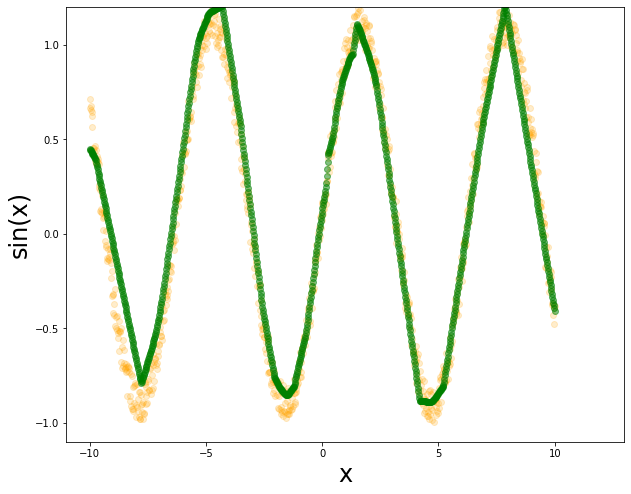

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
# ax.set_title('Regression Analysis - model 3, Batches', fontsize=35)
ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('sin(x)', fontsize=24)
ax.set_xlim(-11.0, 13.0)
ax.set_ylim(-1.1, 1.2)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange", alpha=0.2)
prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.show()

## Q4. Corner detection using CNNs

In this section we will implement a Convolution Neural Network(CNN) for detecting corners in images. In particular given an image with a corner in it, the CNN will output the coordinates of the corner in the image.



In [20]:
import pickle
from torch.utils.data import TensorDataset, DataLoader

In [21]:
### Only run this cell if you're mounting google drive and using it to acccess 
### the data. If using please change the path accordingly
#import os
#os.chdir('/content/drive/My Drive/.....')

In [22]:
data, labels = pickle.load(open('./corner_dataset_100x100.pick', 'rb'))

In [23]:
tensor_x = torch.Tensor(data) # transform to torch tensor
tensor_y = torch.Tensor(labels)

dataset = TensorDataset(tensor_x,tensor_y) # create your datset
train_split, test_split = int(0.75 * len(dataset)), int(0.25 * len(dataset) + 1) 
print(train_split, test_split, len(dataset))
trainset, testset = torch.utils.data.random_split(dataset, [train_split, test_split])

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=True)
# dataloader = DataLoader(dataset, batch_size =128, shuffle = True) # create your dataloader

8559 2854 11413


### Q 4.1 Implement the CNN [10 points]
Complete the code below to implement your model. You will have design your own CNN that can detect corners in images. You can find the list of layers available as part of pytorch [here](https://pytorch.org/docs/stable/nn.html). You will use a combination of the following layers:
- Convolution layer - this layer performs convolution on the images. [doc](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)
- MaxPool Layer - maxpool layers are used to reduce the dimensions of feature maps while maintaining translation invariance. [DOC](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)
- Flatten - Since the output of the convolution layers are image like feature maps you will need a layer which can convert or flatten the image into a single array. This layer does that. [DOC](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten)
- Non Linearities - You need a non-linear activation function after each layer. You have several choices for these such as sigmoid, relu etc. [DOC](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)

In [24]:
# this is one way to define a network
class CornerNet(torch.nn.Module):
    def __init__(self):
        super(CornerNet, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(1,32, kernel_size=(3,3), stride=1, padding=1)        
        # ... continue the construction of the network
        ### YOUR CODE HERE
        # Hint: You may need torch.nn.Conv2d(), torch.nn.MaxPool2D(), torch.nn.Flatten(), torch.nn.Linear(), torch.nn.Sigmoid(), torch.nn.ReLU()
        self.maxPool = torch.nn.MaxPool2d(kernel_size=2, stride =2)
        self.relu = torch.nn.ReLU()
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=(5,5), stride=1, padding = 2)
        self.flat = torch.nn.Flatten()
        self.drop = torch.nn.Dropout()
        self.fc1 = torch.nn.Linear(40000, 1024)
        self.fc2 = torch.nn.Linear(1024, 1)

        
        ### END OF CODE

    def forward(self, x):
      x = self.conv1(x)
      ### YOUR CODE HERE
      # make sure to be consistent with your network definition in __init__() function of this class  
      x = self.relu(x)
      x = self.maxPool(x)

      x = self.conv2(x)
      x = self.relu(x)
      x = self.maxPool(x)
      x = self.drop(x)

      x = self.flat(x)
      x = self.fc1(x)
      x = self.fc2(x)
      
      ### END OF CODE

      return x
        

net = CornerNet()
print(net)

CornerNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (flat): Flatten(start_dim=1, end_dim=-1)
  (drop): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=40000, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1, bias=True)
)


Feel free to change and explore hyperparameters such as learning rate (lr) and number of epochs. You may use different optimizer or criterions as well to improve your accuracy.

In [34]:
lr = 3e-3
optimizer = torch.optim.Adagrad(net.parameters(), lr = lr)
criterion = torch.nn.MSELoss()
cuda_status = torch.cuda.is_available()
torch.set_default_tensor_type('torch.cuda.FloatTensor')



if cuda_status:
  net = net.cuda()
  
net.train()
for epoch in range(80):
  training_loss = 0
  for i,(x,y) in enumerate(trainloader):
    y /= 100
    if cuda_status:
      y = y.cuda()
      x = x.cuda()
    x = torch.unsqueeze(x,1)
    out = net(x)
    #print(out.size())
    loss = criterion(out, y)
    training_loss += loss.item()
    loss.backward()
    optimizer.step()
  training_loss /= i
  print("\tEpoch: {} Loss: {}".format(epoch, training_loss))


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([64, 2])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([47, 2])) that is different to the input size (torch.Size([47, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


	Epoch: 0 Loss: 11.708397865995654
	Epoch: 1 Loss: 6.221773852587194
	Epoch: 2 Loss: 5.484881425514481
	Epoch: 3 Loss: 4.333641434438471
	Epoch: 4 Loss: 4.161744886855209
	Epoch: 5 Loss: 4.059875249694612
	Epoch: 6 Loss: 3.705395139137605
	Epoch: 7 Loss: 3.163185778333056
	Epoch: 8 Loss: 3.6484220714721465
	Epoch: 9 Loss: 3.084702950307077
	Epoch: 10 Loss: 3.2727886449013437
	Epoch: 11 Loss: 2.848337223011076
	Epoch: 12 Loss: 3.275871658179545
	Epoch: 13 Loss: 2.5208719441093
	Epoch: 14 Loss: 2.8389335733775356
	Epoch: 15 Loss: 2.9145685498483647
	Epoch: 16 Loss: 2.4043147552730444
	Epoch: 17 Loss: 2.386162508503163
	Epoch: 18 Loss: 2.6061332229160725
	Epoch: 19 Loss: 2.5499210247587887
	Epoch: 20 Loss: 2.274404217762158
	Epoch: 21 Loss: 2.1225476115661905
	Epoch: 22 Loss: 2.145056552736831
	Epoch: 23 Loss: 2.2294568294253114
	Epoch: 24 Loss: 2.2809869014567004
	Epoch: 25 Loss: 2.256791237321563
	Epoch: 26 Loss: 2.182259957369109
	Epoch: 27 Loss: 2.1146170859106053
	Epoch: 28 Loss: 2.0

We will now evaluate our trained network on the test dataset. Please report the final test loss your network achieves on the data

best FINAL LOSS: final loss was 0.07817043249208228
best TEST LOSS: Test loss was  0.05119854855266484

In [35]:
net.cpu()
net.eval()
with torch.no_grad():
  test_loss = 0
  for i,(x,y) in enumerate(testloader):
    y /= 100
    x = torch.unsqueeze(x, 1)
    coords = net(x)
    loss = criterion(y, coords).item()
    test_loss += loss
  test_loss /= i
  print("Test loss: ", test_loss)

RuntimeError: ignored

### Visualize performance

Let's try to visualize the performance of the model. We will plot the image first and then overlay the coordinates of the corner on top of the image to see if the location is correct

In [ ]:

with torch.no_grad():
  for i,(x,y) in enumerate(testloader):
    x = torch.unsqueeze(x, 1)
    coords = net(x)

    for j in range(10):
      fig, ax = plt.subplots()
      ax.imshow(x[j][0], cmap=plt.cm.gray)
      pts = y[j]
      pts = coords[j] * 100
      print(pts)
      print(y[j])
      ax.plot(pts[1], pts[0], color='red', marker='o',
              linestyle='None', markersize=6)
      plt.show()

    break

In [ ]:
print("The analogy on piazza of feeling like a monkey hits much too close to home with this part")